<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/Forecasting_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price prediction using Facebook Prophet 

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [4]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [5]:
df= pd.read_csv("AMZN.csv")

In [6]:
#read_csv function from pandas

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-09,3115.989990,3193.879883,3074.000000,3182.629883,3182.629883,6388700
1,2020-07-10,3191.760010,3215.000000,3135.699951,3200.000000,3200.000000,5486000
2,2020-07-13,3251.060059,3344.290039,3068.389893,3104.000000,3104.000000,7720400
3,2020-07-14,3089.000000,3127.379883,2950.000000,3084.000000,3084.000000,7231900
4,2020-07-15,3080.229980,3098.350098,2973.179932,3008.870117,3008.870117,5788900
...,...,...,...,...,...,...,...
248,2021-07-02,3451.639893,3511.719971,3436.919922,3510.979980,3510.979980,3169400
249,2021-07-06,3530.110107,3685.479980,3529.000000,3675.739990,3675.739990,6744800
250,2021-07-07,3717.379883,3734.199951,3678.909912,3696.580078,3696.580078,5328100
251,2021-07-08,3643.560059,3759.989990,3621.120117,3731.409912,3731.409912,5174100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,3228.020912,3263.856889,3186.029550,3224.180760,3224.180760,4.138916e+06
std,138.283286,138.130286,142.118754,141.863098,141.863098,1.474285e+06
min,2906.500000,2962.000000,2871.000000,2951.949951,2951.949951,1.451900e+06
25%,3134.000000,3173.050049,3093.600098,3125.000000,3125.000000,3.030200e+06
50%,3208.000000,3238.000000,3166.000000,3204.399902,3204.399902,3.817300e+06
75%,3310.899902,3349.889893,3275.389893,3308.639893,3308.639893,4.936100e+06
max,3722.520020,3759.989990,3693.396729,3731.409912,3731.409912,8.892600e+06


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [10]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [11]:
px.area(df, x="Date", y="Close")

In [12]:
px.line(df, x="Date", y="Close")

In [13]:
px.area(df, x="Date", y="Volume")

In [14]:
px.bar(df, y="Volume")

In [15]:
px.box(df, y="Close")

# Understanding Facebook Prophet

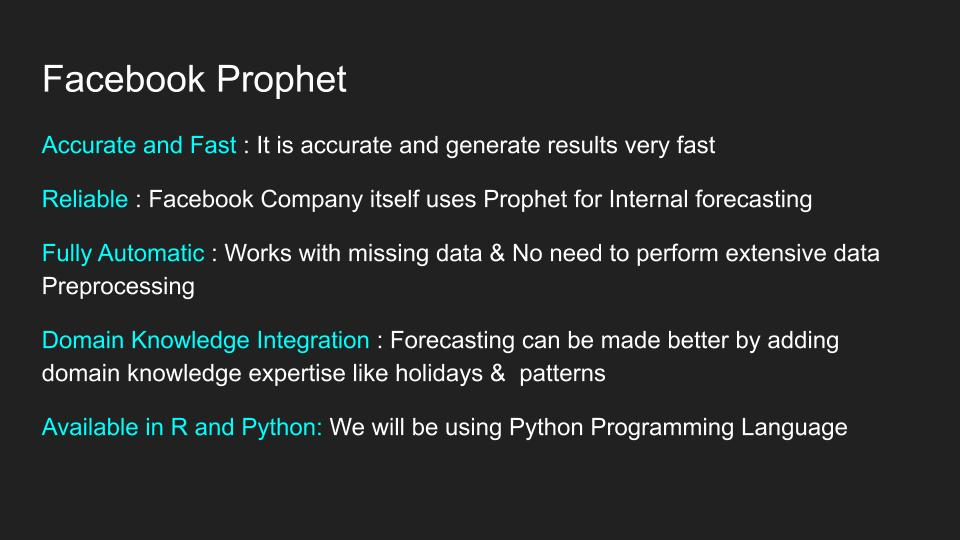

## Data Preperation

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-09,3115.989990,3193.879883,3074.000000,3182.629883,3182.629883,6388700
1,2020-07-10,3191.760010,3215.000000,3135.699951,3200.000000,3200.000000,5486000
2,2020-07-13,3251.060059,3344.290039,3068.389893,3104.000000,3104.000000,7720400
3,2020-07-14,3089.000000,3127.379883,2950.000000,3084.000000,3084.000000,7231900
4,2020-07-15,3080.229980,3098.350098,2973.179932,3008.870117,3008.870117,5788900


In [17]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)

In [18]:
ndf.head()

,Date,Close
0,2020-07-09,3182.629883
1,2020-07-10,3200.000000
2,2020-07-13,3104.000000
3,2020-07-14,3084.000000
4,2020-07-15,3008.870117


In [19]:
prophet_df= ndf.rename(columns={'Date':'ds','Close':'y'})  

In [20]:
prophet_df.head()

,ds,y
0,2020-07-09,3182.629883
1,2020-07-10,3200.000000
2,2020-07-13,3104.000000
3,2020-07-14,3084.000000
4,2020-07-15,3008.870117


## Creating Facebook Prophet Model

In [21]:
m=Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [22]:
future=m.make_future_dataframe(periods=30)

In [23]:
forecast=m.predict(future)

In [24]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-09,3128.118885,2977.556199,3265.657761,3128.118885,3128.118885,-10.192342,-10.192342,-10.192342,-10.192342,-10.192342,-10.192342,0.0,0.0,0.0,3117.926544
1,2020-07-10,3129.690742,2966.171859,3249.459388,3129.690742,3129.690742,-15.050692,-15.050692,-15.050692,-15.050692,-15.050692,-15.050692,0.0,0.0,0.0,3114.640049
2,2020-07-13,3134.406310,2985.002541,3251.949863,3134.406310,3134.406310,-16.085328,-16.085328,-16.085328,-16.085328,-16.085328,-16.085328,0.0,0.0,0.0,3118.320982
3,2020-07-14,3135.978166,2984.420385,3268.987485,3135.978166,3135.978166,-5.235635,-5.235635,-5.235635,-5.235635,-5.235635,-5.235635,0.0,0.0,0.0,3130.742531
4,2020-07-15,3137.550022,2986.891899,3273.471389,3137.550022,3137.550022,-4.753535,-4.753535,-4.753535,-4.753535,-4.753535,-4.753535,0.0,0.0,0.0,3132.796487


In [25]:
px.line(forecast, x='ds',y='yhat')

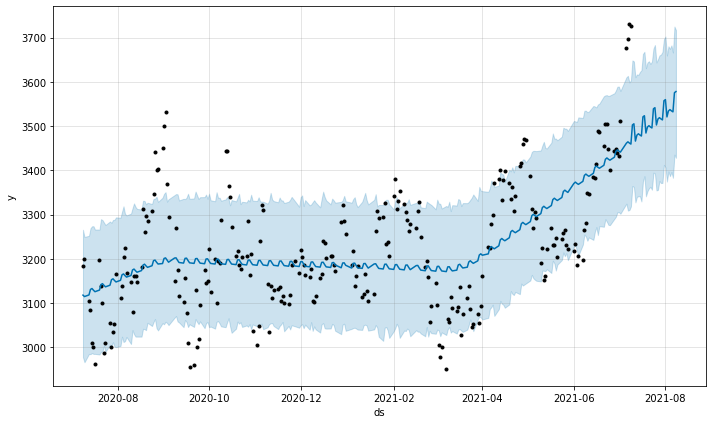

In [26]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

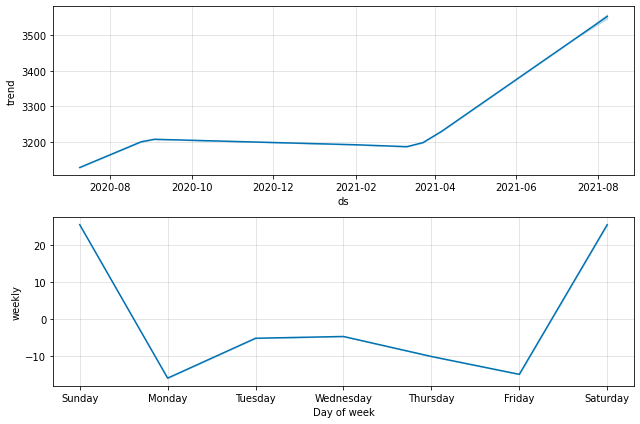

In [27]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [28]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>